In [24]:
import numpy as np
import math
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras


from scipy.optimize import minimize
import nevergrad as ng
from IPython.display import clear_output

from utils import function
import autokeras as ak

from matplotlib import pyplot as pp

In [8]:
class TrainingPlot(tensorflow.keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('mean_squared_error'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_mean_squared_error'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            #plt.figure()
            #subplot(nrows, ncols, plot_number) 
            plt.figure(figsize=(15,6))
            plt.subplot(121)
            plt.title("Training Loss [Epoch {}]".format(epoch))
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.xlabel("Epoch #")
            plt.ylabel("Loss")
            plt.legend()
            
            plt.subplot(122)
            plt.title("Training Accuracy [Epoch {}]".format(epoch))
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.xlabel("Epoch #")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

In [27]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = (1 - (X+2)**2 + 1/(Y)**2)

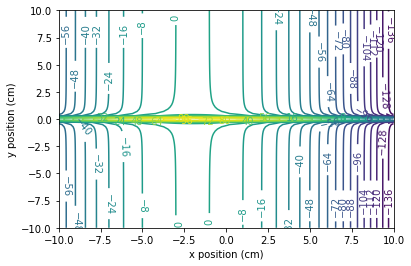

In [28]:
ourplot = pp.contour(X,Y,Z,levels = 30)
pp.xlabel('x position (cm)')
pp.ylabel('y position (cm)')
pp.clabel(ourplot, fontsize=10)
pp.show()

C:\Users\MajidMortazavi\AppData\Local\Temp\ipykernel_11236\281851244.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


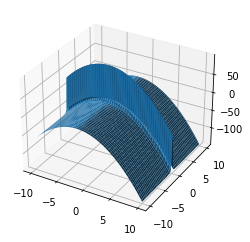

In [29]:

fig = pp.figure()
ax = fig.gca(projection='3d')
mysurf = ax.plot_surface(X,Y,Z)
pp.show()

## Data

In [30]:
df = pd.DataFrame(columns=['X', "Y", 'ProductionYield'], dtype=float)

In [31]:
df['X'] = x
df['Y'] = y
df['ProductionYield'] = Z

df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)
df['ProductionYield'] = df['ProductionYield'].astype(float)

In [32]:
print(df.head())

           X          Y  ProductionYield
0 -10.000000 -10.000000       -62.990000
1  -9.797980  -9.797980       -62.989583
2  -9.595960  -9.595960       -62.989140
3  -9.393939  -9.393939       -62.988668
4  -9.191919  -9.191919       -62.988164


In [33]:
df.describe()

,X,Y,ProductionYield
count,1.000000e+02,1.000000e+02,100.000000
mean,-7.105427e-17,-7.105427e-17,-60.591501
std,5.860907e+00,5.860907e+00,13.822038
min,-1.000000e+01,-1.000000e+01,-62.990000
25%,-5.000000e+00,-5.000000e+00,-62.982576
50%,0.000000e+00,0.000000e+00,-62.960749
75%,5.000000e+00,5.000000e+00,-62.843184
max,1.000000e+01,1.000000e+01,35.010000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                100 non-null    float64
 1   Y                100 non-null    float64
 2   ProductionYield  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


## Prediction algorithm

In [35]:
# normalize the input data
X = df[["X", "Y"]].values
y = df['ProductionYield'].values

X_norm = X #(X - X.mean(axis=0)) / X.std(axis=0)
y_norm = y #(y - y.mean()) / y.std()


x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

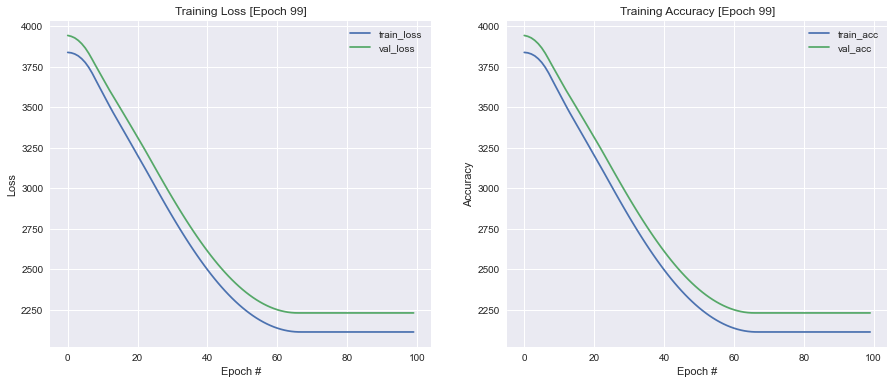

3/3 [==============================] - 1s 563ms/step - loss: 2111.6443 - mean_squared_error: 2111.6443 - val_loss: 2229.2817 - val_mean_squared_error: 2229.2817
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


In [36]:
# define the search
search = ak.StructuredDataRegressor(max_trials=10)

# perform the search
history =  search.fit(x=x_train, 
                      y=y_train.reshape(-1,1),
                      validation_data= (x_test, y_test.reshape(-1,1)),
                      callbacks=[plot_losses], 
                      epochs = 100,
                      verbose=1)

In [146]:
loss, acc = search.evaluate(x_test, y_test, verbose=1)
print('Accuracy: %.4f' % acc)

1/1 [==============================] - 0s 115ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Accuracy: 0.0115


In [147]:
# get the best performing model
model = search.export_model()

# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 2)                0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [148]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))

0.8513019631612064

In [150]:
tp_indx = 6
print(f"real value: {y_test[tp_indx]}, model predicted: {model.predict(x_test[tp_indx].reshape(1,-1))}")

real value: 0.308641975308642, model predicted: [[0.4071634]]


## Multi-dimensional optimization

### 'Nelder-Mead'

In [154]:
def wrapper(x, *args) -> float:
    
    network_input = x.reshape(1,-1)
    network_output = model.predict(network_input, *args)
    scipy_output = float(network_output)
    
    if (scipy_output > -10) & (scipy_output < 10):
        return -scipy_output
    
    else:
        return 10000000

In [160]:
 x_train[4]

array([0.39393939, 0.39393939])

In [161]:
x0 = x_train[4]
res = minimize(wrapper, x0, method='Nelder-Mead', tol=1e-6)

In [162]:
res

 final_simplex: (array([[ 3.92310022, 18.43197661],
       [ 3.92310034, 18.43197645],
       [ 3.9231011 , 18.43197611]]), array([-9.99999905, -9.99999905, -9.99999905]))
           fun: -9.999999046325684
       message: 'Optimization terminated successfully.'
          nfev: 149
           nit: 69
        status: 0
       success: True
             x: array([ 3.92310022, 18.43197661])

In [163]:
res.x

array([ 3.92310022, 18.43197661])

In [164]:
model.predict(res.x.reshape(1,-1))

array([[9.999999]], dtype=float32)

### Bound 'L-BFGS-B'

In [59]:
x0 = x_train[-5].reshape(1,-1)
bnds = ((-3, 3))
res = minimize(wrapper, x0, method='L-BFGS-B',bounds=None, tol=1e-6)

In [60]:
res

      fun: 1000000
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.33825828])